In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
import tensorflow as tf

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1bfHhHfwKSQ4ItIBsJrcO_CsB0A8WSSDv'

In [6]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1bfHhHfwKSQ4ItIBsJrcO_CsB0A8WSSDv


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')  
data = pd.read_csv('data.csv')

In [8]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999,40000,target
0,217,226,224,223,231,229,233,237,237,237,237,236,236,236,235,232,230,232,234,232,236,228,222,223,224,219,218,229,217,219,203,176,158,186,172,184,176,176,136,87,...,105,101,102,97,99,105,97,97,86,88,100,101,92,94,80,69,81,96,79,77,84,104,100,104,77,69,76,82,91,89,93,94,96,94,93,102,95,100,86,0
1,45,53,111,145,148,152,158,157,146,142,148,170,191,201,214,198,189,195,203,207,185,183,204,197,158,61,68,123,176,148,97,116,118,124,139,113,101,120,120,122,...,131,117,165,140,101,87,145,117,93,145,136,117,101,92,72,96,87,53,76,107,88,78,73,80,50,97,114,110,87,118,120,130,115,87,88,106,129,89,82,0
2,101,102,124,164,155,95,86,162,131,99,82,84,83,104,122,115,92,107,138,96,95,100,87,95,96,85,83,114,120,121,104,115,99,105,115,108,97,101,103,97,...,28,29,28,27,26,29,28,27,27,26,25,27,25,28,28,28,27,25,25,25,25,27,28,26,26,28,27,27,27,26,26,26,25,24,26,23,24,23,23,1
3,39,34,32,31,25,22,26,16,22,27,34,108,133,165,225,209,175,146,225,212,159,196,206,88,88,108,111,137,118,192,147,133,88,216,226,239,191,108,109,82,...,91,84,83,88,89,85,87,90,87,86,86,92,77,83,80,82,83,78,78,80,78,77,82,80,78,74,77,78,75,69,70,69,64,60,61,64,64,56,64,0
4,4,46,81,76,43,7,49,49,15,35,37,41,29,90,75,99,28,15,65,125,139,145,90,68,74,115,118,49,82,88,46,46,27,30,19,86,39,112,63,129,...,4,6,9,5,3,7,4,4,7,4,3,8,7,4,7,4,4,9,12,5,8,10,9,5,11,9,4,12,6,5,9,11,6,13,5,12,6,13,6,1


In [9]:
data.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999,40000,target
613,253,252,252,252,252,252,252,252,252,252,252,252,249,246,240,225,210,216,207,181,139,153,206,164,118,120,110,196,121,216,253,254,254,254,254,254,254,254,254,254,...,158,166,154,157,132,129,167,154,183,192,169,106,86,126,139,136,122,109,130,136,156,155,163,160,148,160,161,159,187,194,155,191,183,166,126,153,177,194,199,0
614,52,65,65,75,85,96,102,95,105,96,98,100,103,109,107,86,104,107,131,132,135,135,140,141,137,137,142,141,139,138,137,134,142,140,141,141,142,143,143,138,...,88,86,63,71,89,82,75,124,99,86,76,75,81,84,85,78,65,82,92,82,63,107,62,34,44,73,74,77,83,48,58,55,42,35,50,72,39,30,46,1
615,110,58,44,41,42,42,44,49,50,54,61,61,61,61,58,57,57,70,69,59,54,53,53,53,60,46,42,47,60,63,56,48,52,58,56,55,55,54,51,53,...,68,66,78,78,85,96,83,94,68,69,108,100,104,107,82,50,39,49,67,74,74,71,59,60,61,60,81,81,70,74,56,73,78,84,105,77,92,107,101,0
616,120,125,127,130,131,134,136,135,136,135,133,134,136,138,139,139,138,137,138,139,140,140,140,143,142,136,137,136,137,134,134,128,125,68,111,111,97,90,62,61,...,140,143,140,131,141,140,137,134,137,138,135,135,139,139,135,135,134,135,135,135,140,137,136,130,132,133,136,139,142,143,141,140,128,138,139,141,138,137,135,1
617,130,125,121,132,133,143,133,125,131,139,130,136,125,130,131,136,132,129,123,140,134,124,138,128,144,127,127,138,130,142,135,136,137,127,138,140,132,133,136,138,...,88,78,75,88,93,54,40,30,61,50,79,66,59,76,52,66,21,64,164,158,153,144,150,145,138,146,147,143,143,148,146,143,148,145,137,134,136,134,122,0


In [0]:
X = data.drop('target', axis=1)
y = data['target']

In [0]:
X = X/255

In [0]:
X = X.values.reshape(-1,200,200,1)

In [13]:
X.shape

(618, 200, 200, 1)

In [0]:
y = tf.keras.utils.to_categorical(y)

In [15]:
y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=.2, random_state=1)

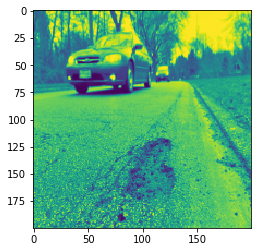

In [18]:
plt.imshow(train_X[1][:,:,0])

In [19]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [20]:
model = Sequential()
input_shape = (200,200,1)
model.add(Conv2D(64, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(32, (3, 3),activation='relu',padding='same'))

model.add(Conv2D(16, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(16, (3, 3),activation='relu',padding='same'))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(8))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))
    
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adamax')













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
import keras

In [22]:
path_model='model_filter.h5' # save model at this location after each epoch

# # fit the model
h=model.fit(train_X,     
            train_y, 
            batch_size=50, 
            epochs=50, 
            verbose=1, 
            # steps_per_epoch=train_X.shape[0] // 100,
            validation_data=(test_X,test_y),
            shuffle=False,
            callbacks = [keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.005, patience=2, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)]
          
            )



Train on 494 samples, validate on 124 samples
Epoch 1/50
494/494 [==============================] - 10s 19ms/step - loss: 0.6718 - acc: 0.5911 - val_loss: 6.2021 - val_acc: 0.5645
Epoch 2/50
494/494 [==============================] - 3s 6ms/step - loss: 0.5303 - acc: 0.7368 - val_loss: 1.1062 - val_acc: 0.5968
Epoch 3/50
494/494 [==============================] - 3s 5ms/step - loss: 0.4396 - acc: 0.7996 - val_loss: 0.6622 - val_acc: 0.6452
Epoch 4/50
494/494 [==============================] - 3s 5ms/step - loss: 0.3848 - acc: 0.8563 - val_loss: 0.4787 - val_acc: 0.7903
Epoch 5/50
494/494 [==============================] - 3s 6ms/step - loss: 0.3414 - acc: 0.9049 - val_loss: 0.4635 - val_acc: 0.7823
Epoch 6/50
494/494 [==============================] - 3s 6ms/step - loss: 0.3034 - acc: 0.9211 - val_loss: 0.4350 - val_acc: 0.7984
Epoch 7/50
494/494 [==============================] - 3s 6ms/step - loss: 0.2609 - acc: 0.9494 - val_loss: 0.4197 - val_acc: 0.8306
Epoch 8/50
494/494 [======

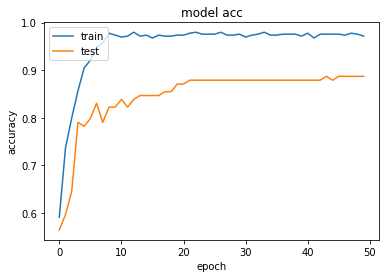

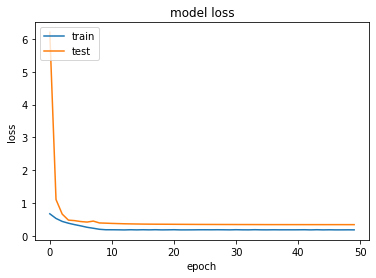

In [23]:
# Accuracy
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Predict the values from the validation dataset
Y_pred = model.predict_classes(test_X)


In [25]:
Y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [26]:
test_y[:,1]

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1.], dtype=float32)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y[:,1], Y_pred) 

array([[63,  6],
       [ 8, 47]])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y[:,1],Y_pred)

0.8870967741935484